In [1]:
import torch
import torch.nn as nn # for creating neural network layers
import torch.nn.functional as F # for activation functions and other functional operations
from torch.optim import SGD # for stochastic gradient descent optimization


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)

    def forward(self, input):
        input_relu1 = input * self.w00 + self.b00
        output_relu1 = F.relu(input_relu1)
        scaled_output_relu1 = output_relu1 * self.w01

        input_relu2 = input * self.w10 + self.b10
        output_relu2 = F.relu(input_relu2)
        scaled_output_relu2 = output_relu2 * self.w11

        input_final_relu = scaled_output_relu1 + scaled_output_relu2 + self.final_bias

        output = F.relu(input_final_relu)

        return output



In [9]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [10]:
model = BasicNN()

In [11]:
output_values = model(input_doses)

In [12]:
output_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

Text(0.5, 1.0, 'Dose vs Effectiveness')

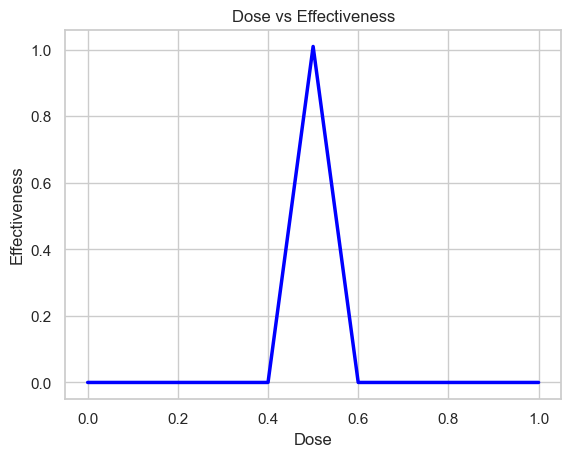

In [13]:
sns.set_theme(style="whitegrid")
sns.lineplot(
    x = input_doses,
    y = output_values,
    color = 'blue',
    linewidth = 2.5
)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')
plt.title('Dose vs Effectiveness')